In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv('laptopPrice.csv')
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i]) 
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,0,34649,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,38999,2,65,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,39999,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,0,69990,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,0,26990,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1,0,10,7,2,1,1,0,2,1,0,0,0,0,0,135990,2,0,0
819,1,0,10,7,2,1,1,0,2,1,0,0,0,0,0,144990,2,0,0
820,1,0,10,7,2,1,1,0,2,1,2,0,0,0,0,149990,2,0,0
821,1,0,10,7,2,1,1,0,2,1,2,0,0,0,0,142990,2,0,0


In [4]:
x=df.drop('Price',axis=1)
y=df['Price']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred=model.predict(x_test)
y_pred

array([100580.        ,  39703.75      ,  39287.22      ,  40555.54      ,
        73932.98      ,  71355.9       , 149958.25666667,  37536.70666667,
        54696.51      ,  53353.09      , 153424.7297619 ,  63311.56      ,
        77204.23      ,  58606.52      ,  61489.57      ,  51991.67      ,
        42689.39      ,  64015.915     ,  52583.86      ,  89693.09      ,
        85552.33      ,  65402.02      ,  77142.26      ,  56521.77      ,
        80940.14      ,  67973.41      ,  62184.6245    ,  63921.47      ,
        38573.        ,  41185.9       ,  72434.42      ,  74180.665     ,
        65171.68      ,  42853.13      ,  63491.93      , 151658.16      ,
        54346.63      ,  41569.47      ,  87249.728     ,  37279.81666667,
        66356.46      ,  44801.84      ,  64615.15      , 120762.89333333,
        56693.94      ,  37752.04      ,  63296.        ,  51398.34      ,
        38065.91      ,  90691.38      , 138483.7025    , 137877.54      ,
        70429.655     ,  

In [8]:
r_score=r2_score(y_pred,y_test)
r_score


0.37501016857732405

In [9]:
mse=mean_squared_error(y_pred,y_test)
print(mse)
rmsc=np.sqrt(mse)
rmsc

697802117.3823723


np.float64(26415.94437801481)

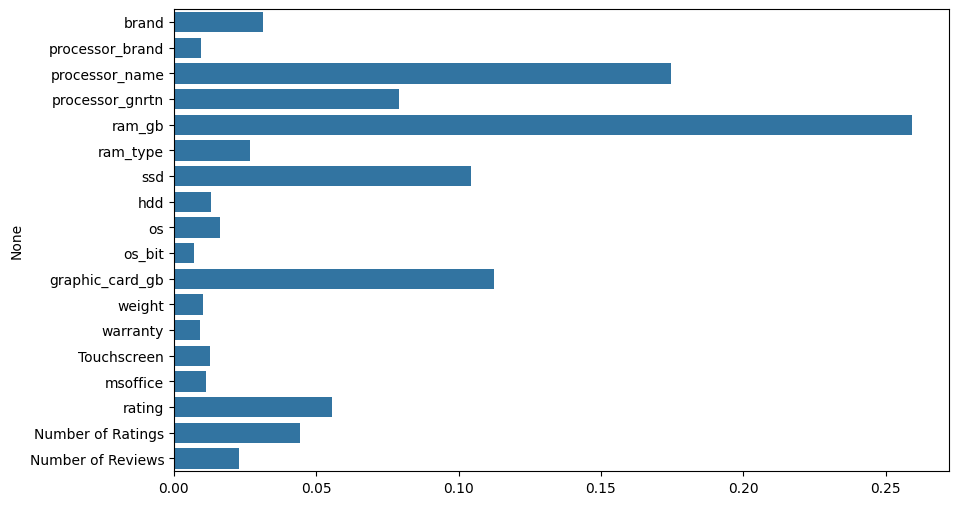

In [10]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [13]:
new_data=pd.DataFrame({
    'brand':label.fit_transform(['Lenovo']),
    'processor_brand':label.fit_transform(['Intel']),
    'processor_name':label.fit_transform(['Core i3']),
    'processor_gnrtn':label.fit_transform(['10th']),
    'ram_gb':label.fit_transform(['4 GB']),
    'ram_type':label.fit_transform(['DDR4']),
    'ssd':label.fit_transform(['0 GB']),
    'hdd':label.fit_transform(['0 GB']),
    'os':label.fit_transform(['Windows 10']),
    'os_bit':label.fit_transform(['64 bit']),
    'graphic_card_gb':label.fit_transform(['0 GB']),
    'weight':label.fit_transform(['Casual']),
    'warranty':label.fit_transform(['No warranty']),
    'Touchscreen':label.fit_transform(['No']),
    'msoffice':label.fit_transform(['No']),
    "rating":label.fit_transform(['3 stars']),
    'Number of Ratings':0,
    'Number of Reviews':0
})
predicted_price=model.predict(new_data)
print(predicted_price)




[166705.37333333]
